In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import random
from skimage.transform import rotate,rescale,resize, AffineTransform, warp
from glob import glob

In [ ]:
#Image augmentation using respective function with random inputs
def rotation(img):
    angle = random.randint(0, 359)
    img = rotate(img, angle)
    return img

def scale(img):
    width = np.arange(10, img.shape[0], 20)
    height = np.arange(10, img.shape[1], 20)
    w, h = random.choice(width), random.choice(height)
    resized_img = cv2.resize(img, (w, h))
    img = np.uint8(resized_img)
    return img

def shift(img):
    horizontal_shift = random.randint(-1*img.shape[0], img.shape[0]) # changing x and y (read dovs on skimage transforms)
    vertical_shift = random.randint(-1*img.shape[1], img.shape[1])
    transform = AffineTransform(translation=(horizontal_shift, vertical_shift))
    img = warp(img, transform, mode='wrap')
    return img

def warping(img):
    shear_factor = random.uniform(-0.5, 0.5)
    transform = AffineTransform(shear=shear_factor)
    img = warp(img, transform, mode='wrap')
    return img

#Reading the images 
images = []
files = os.listdir("leaves/")
for i in files:
    image = cv2.imread("leaves/"+i)
    images.append(image)
    
#Choosing transformation functions randomly and performing augmentation
number_of_aug = 100
for i in range(0, number_of_aug):
    image_no = random.randint(0, len(images)-1)  
    image = images[image_no]
    transformations = ['rotate', 'scale', 'shift', 'warp']
    transform_choice = random.choice(transformations)
    if(transform_choice=='rotate'):
        aug_image = rotation(image)
    elif(transform_choice=='scale'):
        aug_image = scale(image)
    elif(transform_choice=='shift'):
        aug_image = shift(image)
    else:
        aug_image = warping(image)
    #Saving the tranformed images
    plt.imsave("TransformedLeaves/"+str(transform_choice)+str(i)+'.png', aug_image)
    # print(i)

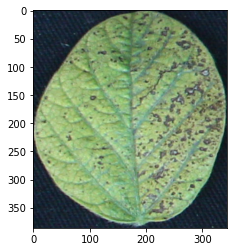

In [ ]:
# reading the first image
image = cv2.imread('leaves/I1.png')
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# plt.figure(figsize=(30,20))
plt.imshow(image)

In [ ]:
np.shape(image)

(386, 344, 3)

62 68


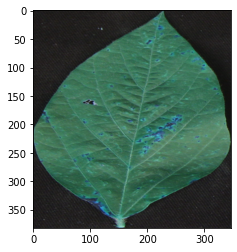

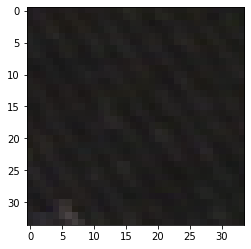

159 90


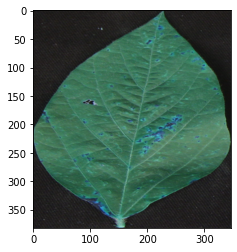

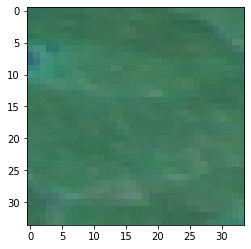

148 170


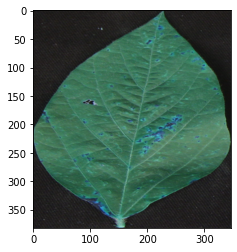

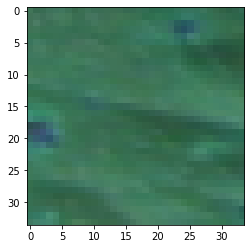

248 52


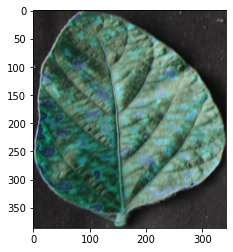

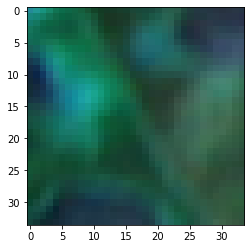

291 237


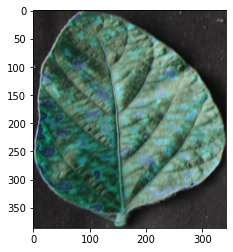

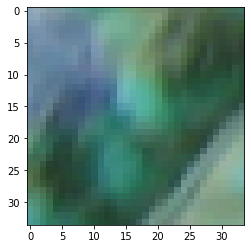

189 270


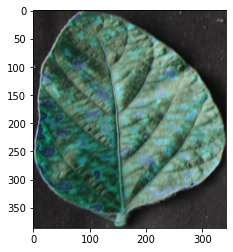

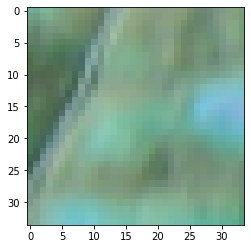

236 91


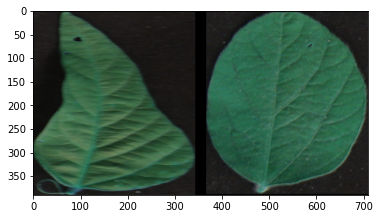

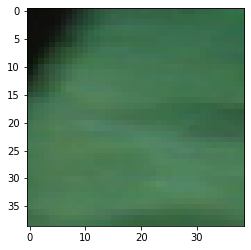

296 243


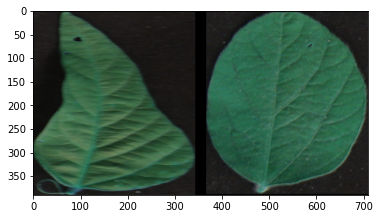

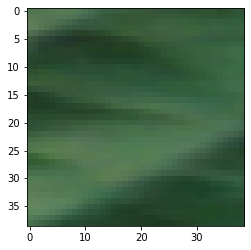

188 78


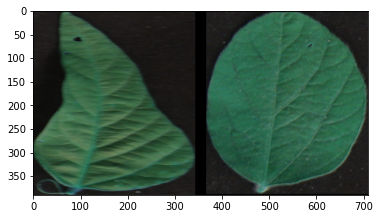

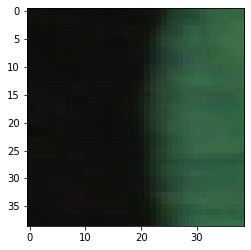

172 261


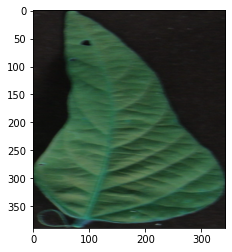

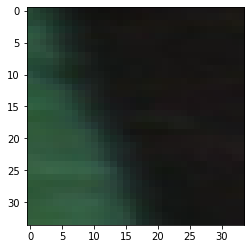

243 140


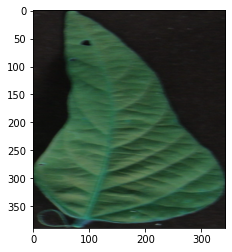

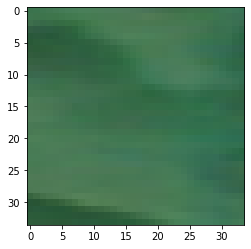

128 181


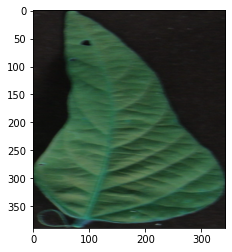

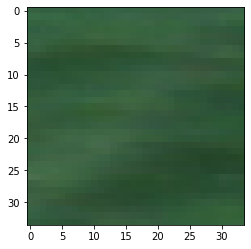

143 234


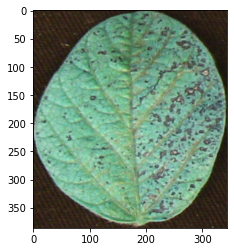

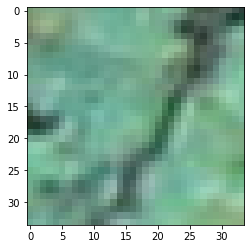

121 171


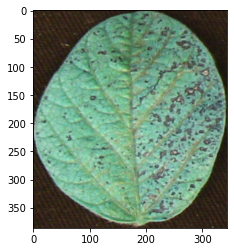

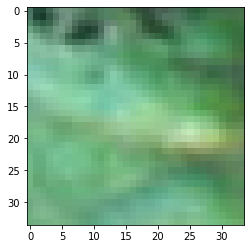

56 58


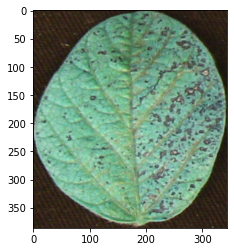

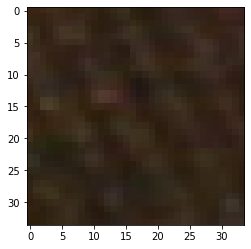

175 121


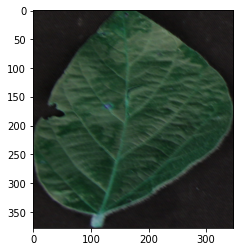

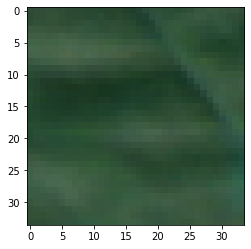

140 60


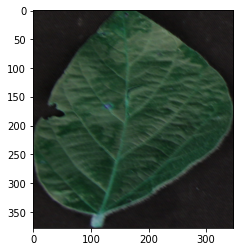

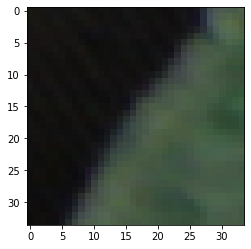

283 139


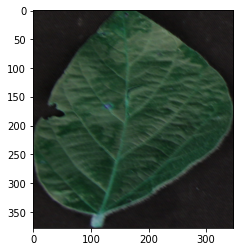

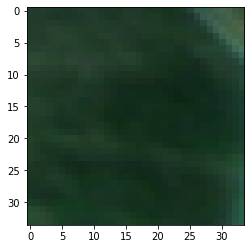

270 290


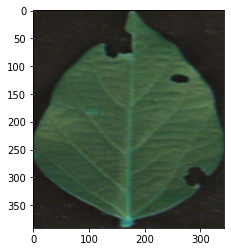

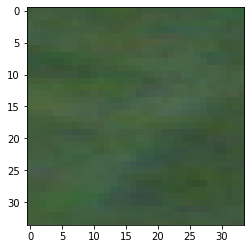

290 111


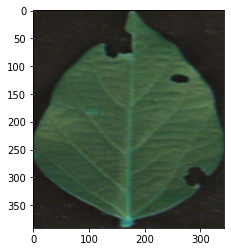

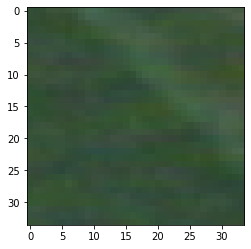

299 241


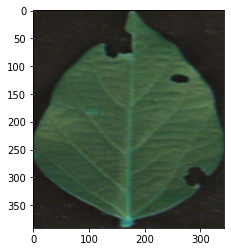

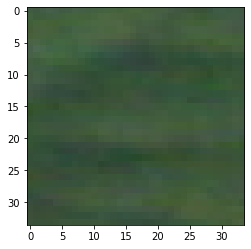

163 197


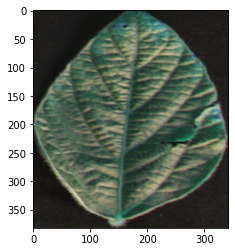

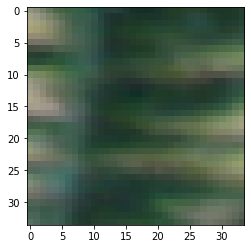

253 277


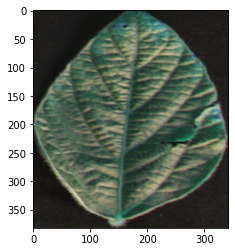

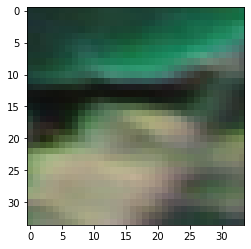

154 193


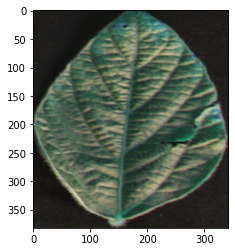

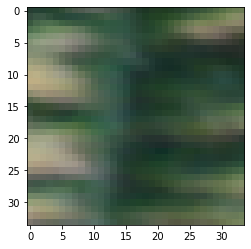

In [ ]:
files = os.listdir('leaves/')
for i in range(0, len(files)):
    image = cv2.imread('leaves/'+files[i])
    for patch in range(3):
      # calc patch position and extract the patch
      # choosing a number below the shape of the patches (385, 344)
      dim1 = random.randint(50, 320)
      dim2 = random.randint(50, 310)
      print(dim1, dim2)
      patch_center = np.array([dim1, dim2])
      patch_scale = 0.1
      smaller_dim = np.min(image.shape[0:2])
      # print(smaller_dim)
      patch_size = int(patch_scale * smaller_dim)
      # print(patch_size)
      patch_x = int(patch_center[0] - patch_size)
      patch_y = int(patch_center[1] - patch_size)
      patch_image = image[patch_x:patch_x+patch_size, patch_y:patch_y+patch_size]

      # show image and patch
      plt.imshow(image)
      plt.show()
      plt.imsave("Patches/"+str(i)+str(patch)+'.png', patch_image)
      plt.imshow(patch_image)
      plt.show()

shape of array:  (24, 32, 32, 3)
24
ptch: (24, 3072)
max ptch: 228
ptch max after normalizing:  1.0
ptch mean:  0.3268978126332542
ptch min after: -0.3845029239766082 ptch max after: 0.6524122807017545
Shape of covariance matrix:  (3072, 3072)

shape: (3072, 3072)
min: 0.0
max: 1.0


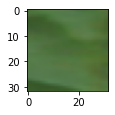

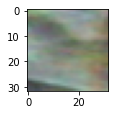

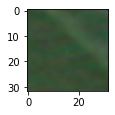

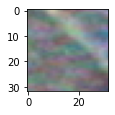

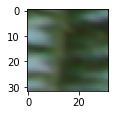

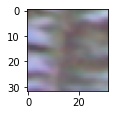

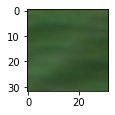

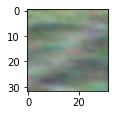

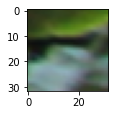

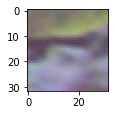

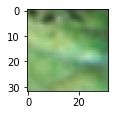

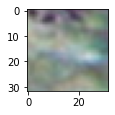

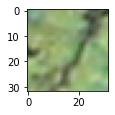

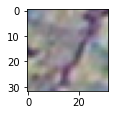

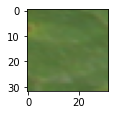

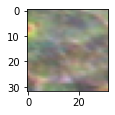

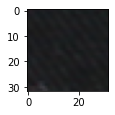

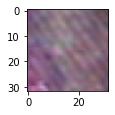

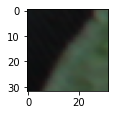

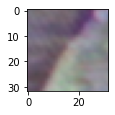

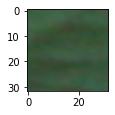

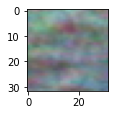

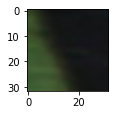

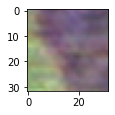

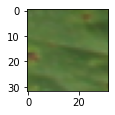

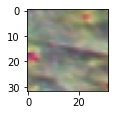

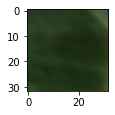

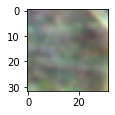

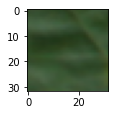

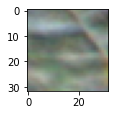

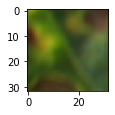

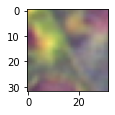

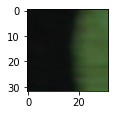

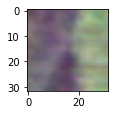

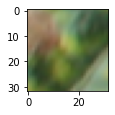

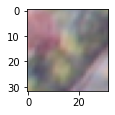

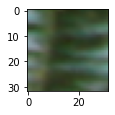

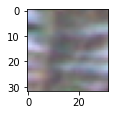

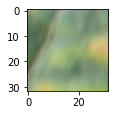

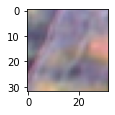

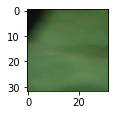

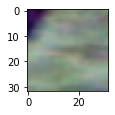

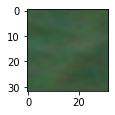

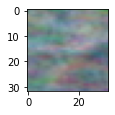

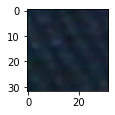

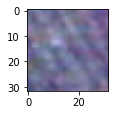

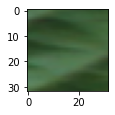

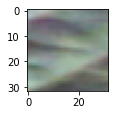

In [ ]:
# Specify the folder to find all images 
patch_files = glob("Patches/*")

def resize_image(img):
  return(cv2.resize(img, (32, 32)))

def plotImage(X):
  plt.figure(figsize=(1.5, 1.5))
  plt.imshow(X.reshape(32, 32, 3))
  plt.show()
  plt.close()

# Initialize an empty list to store all the images data
patches_list = []    

# loop through the folder to retrieve all images 
for file in range(len(patch_files)):
    img = cv2.imread(patch_files[file])
    img = resize_image(img)
    # print(img.shape, img.max())
    patches_list.append(img)
patches_array = np.asarray(patches_list)
print("shape of array: ", patches_array.shape)
print(len(patches_array))


# Reshape the images/ flatten them
ptch = patches_array.reshape(patches_array.shape[0],patches_array.shape[1]*patches_array.shape[2]*patches_array.shape[3])
print("ptch:", ptch.shape)

# normalize the data
print("max ptch:", ptch.max())
ptch = ptch / ptch.max()
print("ptch max after normalizing: ", ptch.max())

# Subtract the mean from the normalized pixels  
print("ptch mean: ", ptch.mean())
ptch = ptch - ptch.mean(axis=0)
print("ptch min after:", ptch.min(), "ptch max after:", ptch.max())

# Find the covariance of the pixels
cov = np.cov(ptch, rowvar=False)
print("Shape of covariance matrix: ", cov.shape)

#Decompose the cov matrix into its singular values and singular vectors.
U,S,V = np.linalg.svd(cov) # Singular Value Decomposition, https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html
print ('\nshape:', np.diag(S).shape)



epsilon = 0.1
# Epsilon = 0.8
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(ptch.T).T
X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())
print ('min:', X_ZCA_rescaled.min())
print ('max:', X_ZCA_rescaled.max())

for i in range(len(patches_array)):
  plotImage(patches_array[i, :])
  plotImage(X_ZCA_rescaled[i, :])

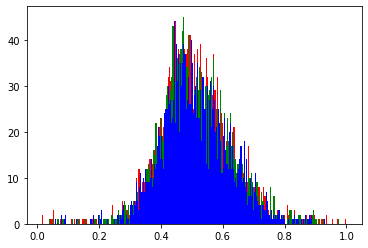

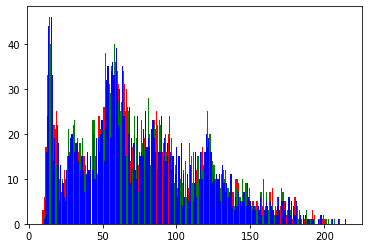

In [ ]:
#Plotting channel distributions of the pre-whitened images
#Reshaping pre whitened images
X_ZCA_reshaped = np.reshape(X_ZCA_rescaled, (-1, patches_array.shape[1], patches_array.shape[2], patches_array.shape[3]))
_ = plt.hist(X_ZCA_reshaped[:, :, 0].ravel(), bins = 256, color = 'red')
_ = plt.hist(X_ZCA_reshaped[:, :, 1].ravel(), bins = 256, color = 'Green')
_ = plt.hist(X_ZCA_reshaped[:, :, 2].ravel(), bins = 256, color = 'Blue')
plt.show()

#Plotting channel distributions of the original images
_ = plt.hist(patches_array[:, :, 0].ravel(), bins = 256, color = 'red')
_ = plt.hist(patches_array[:, :, 1].ravel(), bins = 256, color = 'Green')
_ = plt.hist(patches_array[:, :, 2].ravel(), bins = 256, color = 'Blue')
plt.show()